## Working through an example - car stopping distances
The **cars** dataset contains stopping distances of cars from 1920’s. First we’ll analyse and understand the variables.

The aim of this exercise - build a simple regression model that we can use to predict Distance (dist) by establishing a statistically significant linear relationship with Speed (speed).

## First step - checking model assumptions
Linear models, as with any kind of models, require that we check their assumptions to justify their application. The accuracy and interpretability of the results comes from adhering to a model's assumptions. 

Sometimes these will be rigorous assumptions in the sense that if they are not strictly met, then the model is not considered to be valid at all. Other times, we will be working with more flexible assumptions in which a degree of
criteria from the analyst will come into play.

For linear models, the following are some of the core assumptions: <br> 
**Linearity:** There is a linear relation among the variables <br> 
**Normality:** Residuals are normally distributed <br> 
**Homoscedasticity:** Residuals have constant variance <br> 
**No collinearity:** Variables are not linear combinations of each other <br> 
**Independence:** Residuals are independent or at least not correlated <br> 

The independence assumption is probably the most difficult assumption to test, and you can generally handle it with common sense and understanding how the data was collected.

First lets understand the **cars** dataset variables graphically. Typically, for each of the independent variables (predictors), the following plots are drawn to visualise their behaviour:<br>

**Scatter plot:** Visualise the linear relationship between the predictor and response.<br>
**Box plot:** To spot any outlier observations in the variable. Having outliers in your predictor can drastically affect the predictions as they can easily affect the direction/slope of the line of best fit.<br>
**Density plot:** To see the distribution of the predictor variable. Ideally, a close to normal distribution (a bell shaped curve), without being skewed to the left or right is preferred. <br>

Let us see how to make each one of them.


### Checking linearity

A basic way of checking the linearity assumption is to make a **scatter plot** with the dependent variable in the `y axis` and an independent variable in the `x axis`. If the relation appears to be linear, **the assumption is validated**. 

In any interesting problem it's extremely hard to find a scatter plot that shows a very clear linear relation, and if it does happen we should be a little suspicious and careful with the data.

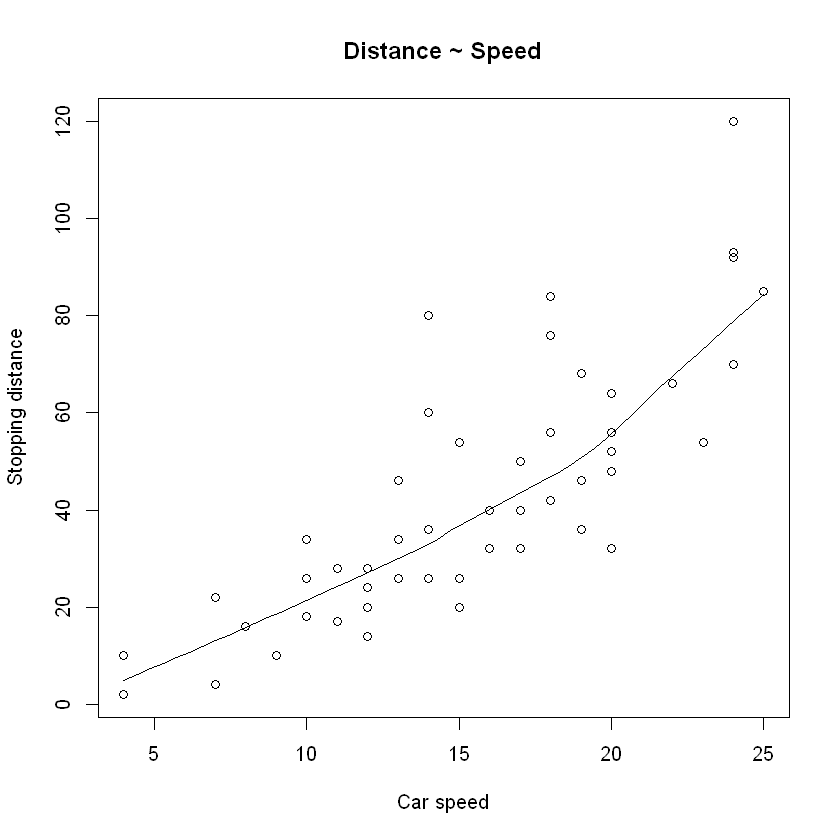

In [9]:
scatter.smooth(x = cars$dist, 
               y = cars$speed, 
               main = "Distance ~ Speed",
               xlab = "Car speed",
               ylab = "Stopping distance")

The scatter plot along with the smoothing line above suggests a linearly increasing relationship between the `dist` and `speed` variables. 

This is good because, one of the underlying assumptions in linear regression is that the relationship between the response and predictor variables is linear and additive.

We can also use the `ggplot` function as we did with Brexit data during descriptive statistics assessment (see Blackboard).

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"Ignoring unknown parameters: regression"
`geom_smooth()` using formula 'y ~ x'



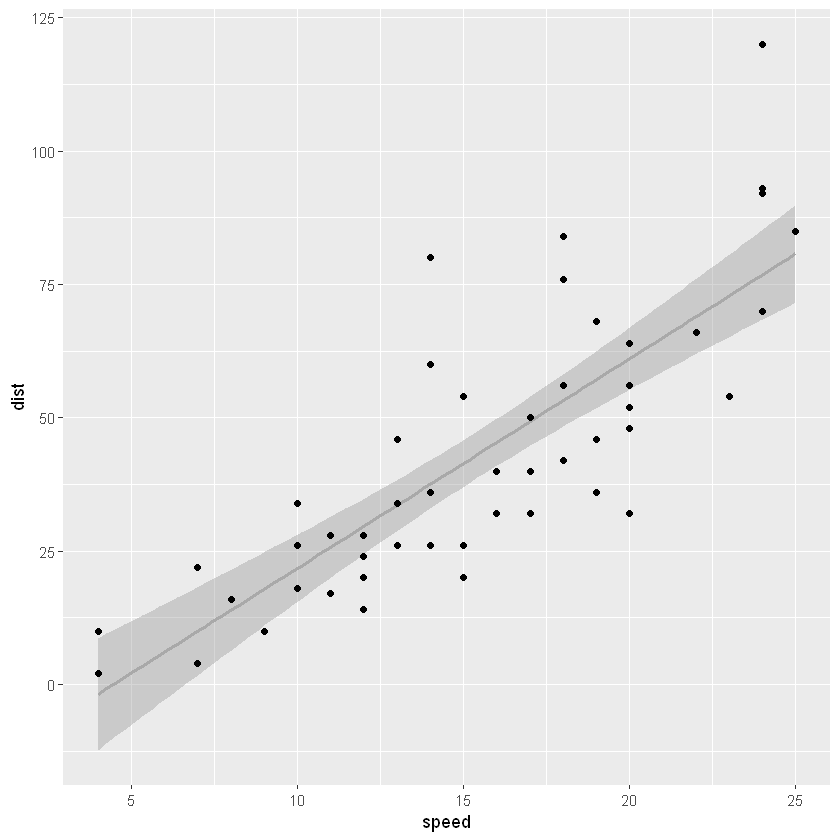

In [10]:
library(ggplot2)
plot <- ggplot(cars, aes(x = speed, y = dist))
plot <- plot + stat_smooth(method = "lm", col = "darkgrey", regression = TRUE)
plot <- plot + scale_color_viridis_c()
plot <- plot + geom_point()
print(plot)

### Correlation
Correlation is a statistical measure that suggests the level of linear dependence between two variables, that occur in pairs – just like what we have here in speed and dist. Correlation can take values between -1 to +1. 

If we observe for every instance where speed increases, the distance also increases along with it, then there is a high positive correlation between them and therefore the correlation between them will be closer to +1. 

The opposite is true for an inverse relationship, in which case, the correlation between the variables will be close to -1.

A value closer to 0 suggests a weak relationship between the variables. 

A low correlation (-0.2 < x < 0.2) probably suggests that much of variation of the response variable (Y) is unexplained by the predictor (X), in which case, we should probably look for better explanatory variables.

In [11]:
cor(cars$speed, cars$dist)

[1] 0.8068949

This is a high correlation value and suggests a high positive correlation between both variables.

### Checking for outliers
Generally, any data point that lies outside the **1.5 * interquartile-range (1.5 * IQR)** is considered an outlier,

Where:

**IQR** is calculated as the distance between the 25th percentile and 75th percentile values for that variable.

We’ll need to check both distance and speed.

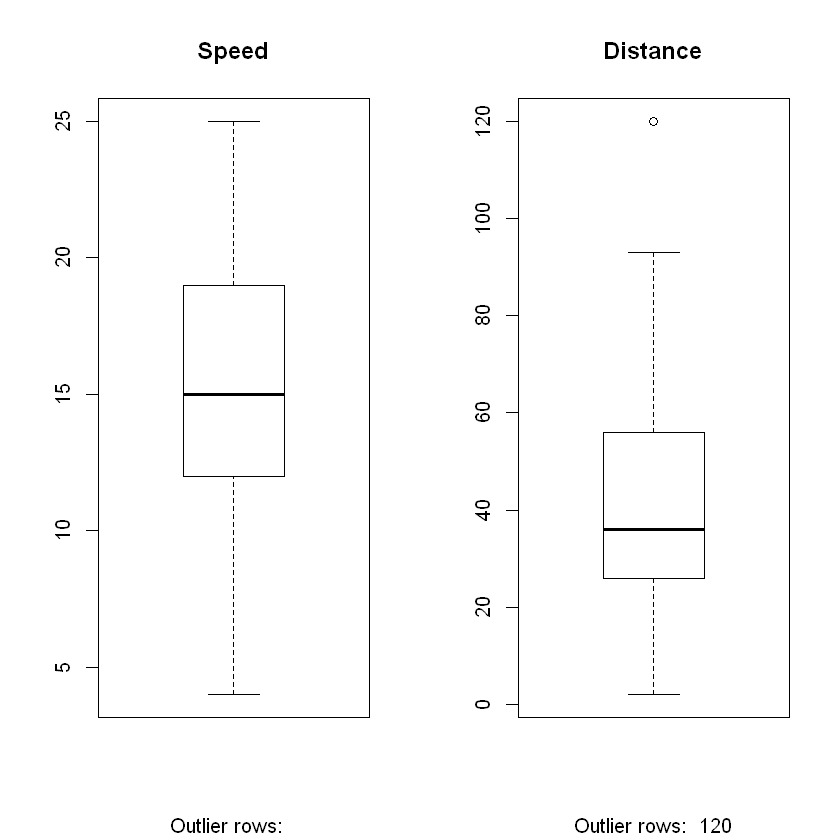

In [12]:
opar <- par(no.readonly = TRUE)
par(mfrow = c(1, 2)) # divide graph area in 2 columns
attach(cars)
boxplot(speed, 
        main = "Speed", 
        sub = paste("Outlier rows: ", 
                    boxplot.stats(speed)$out)) # box plot for 'speed'

boxplot(dist, 
        main = "Distance", 
        sub = paste("Outlier rows: ", 
                    boxplot.stats(dist)$out)) # box plot for 'distance'

detach(cars)
par <- opar

The boxplots suggest that there is 1 outlier in the data in the distance variable where the speed is **120**.

In [13]:
nrow(cars)

[1] 50

In [14]:
cars <- subset(cars, cars$dist!=120)

In [15]:
nrow(cars)

[1] 49

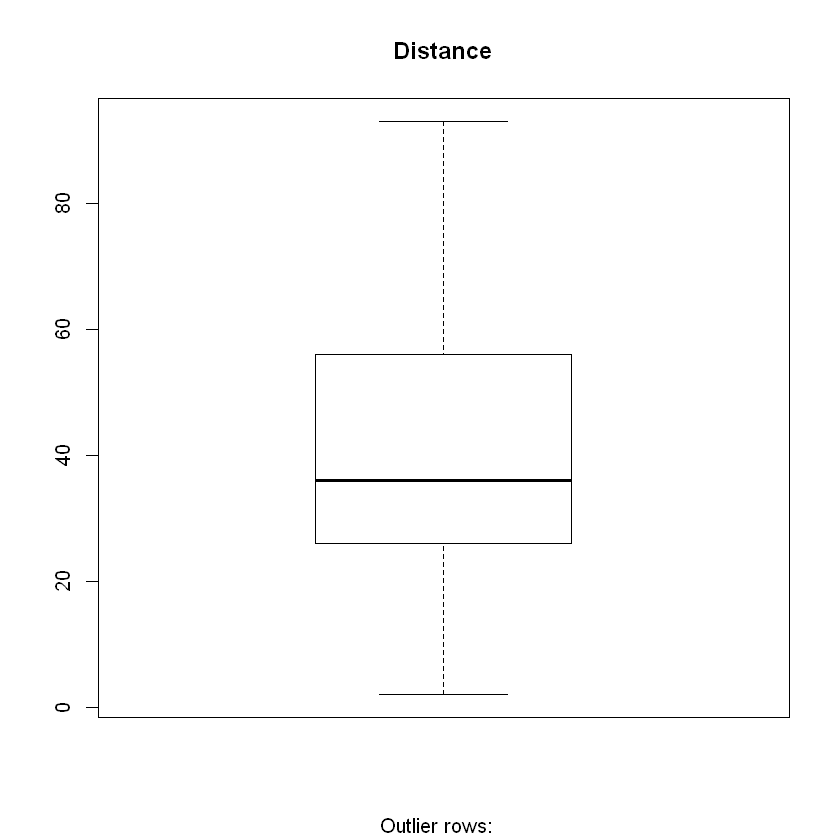

In [16]:
boxplot(cars$dist, 
        main = "Distance", 
        sub = paste("Outlier rows: ", 
                    boxplot.stats(cars$dist)$out)) # box plot for 'distance'

### Checking normality with histograms and quantilequantile plots
We will check normality with two different techniques so that we can exemplify the usage of a technique known as the strategy pattern, which is part of a set of patterns from object oriented programming.

We can use the e1071 library to access skewness function and show in our plot

Warning message:
"package 'e1071' was built under R version 3.6.3"


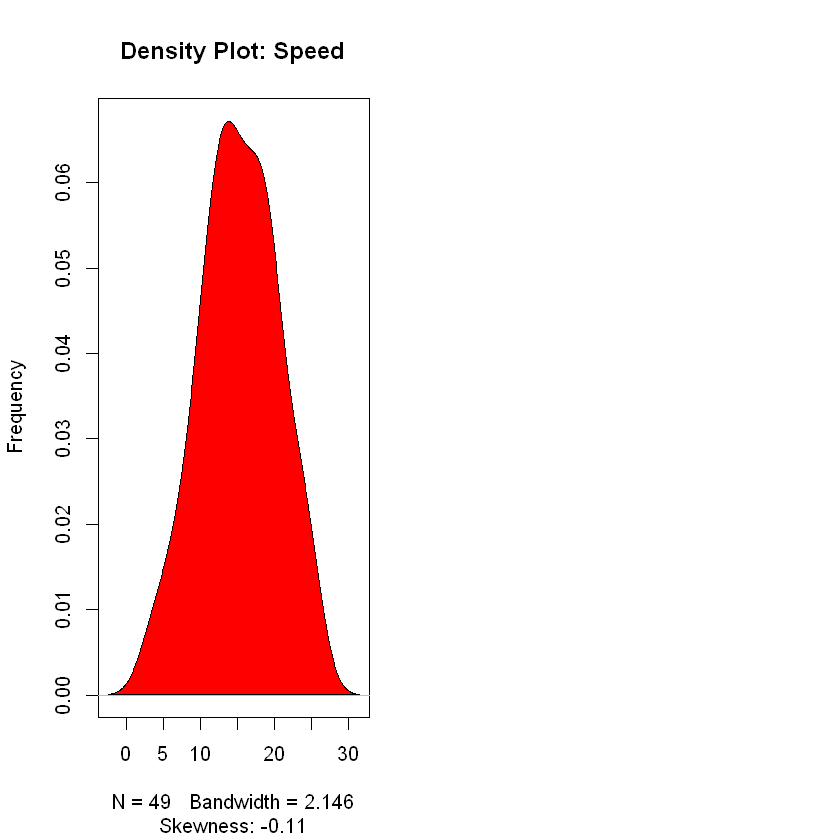

In [17]:
# Skewness function to examine normality of data
#install.packages("e1071")
library(e1071)
# divide graph area in 2 columns
par(mfrow = c(1, 2))
# density plot for 'speed'
plot(density(cars$speed), main = "Density Plot: Speed", 
     ylab = "Frequency", 
     sub = paste("Skewness:", 
                 round(e1071::skewness(cars$speed), 2)))

# Lets fill in the area under the density plot in red
polygon(density(cars$speed), col = "red")
# Minimal skewness = -0.11 - slightly skewed to the left
# NB - skewness <-1 or >1 = highly skewed
# -1 to -05 and 0.5 to 1 = moderately skewed
# -0.5 to 0-5 = approx symetric

The plot shows minimal skewness with the data.

Minimal skewness = -0.11 - slightly skewed to the left.<br>
NB a skewness value <-1 or >1 = highly skewed.<br>
Skewness -1 to -05 and 0.5 to 1 = moderately skewed.<br>
And skewness -0.5 to 0-5 = approx symetric.<br>

No we need to repat this for the `distance` variable.

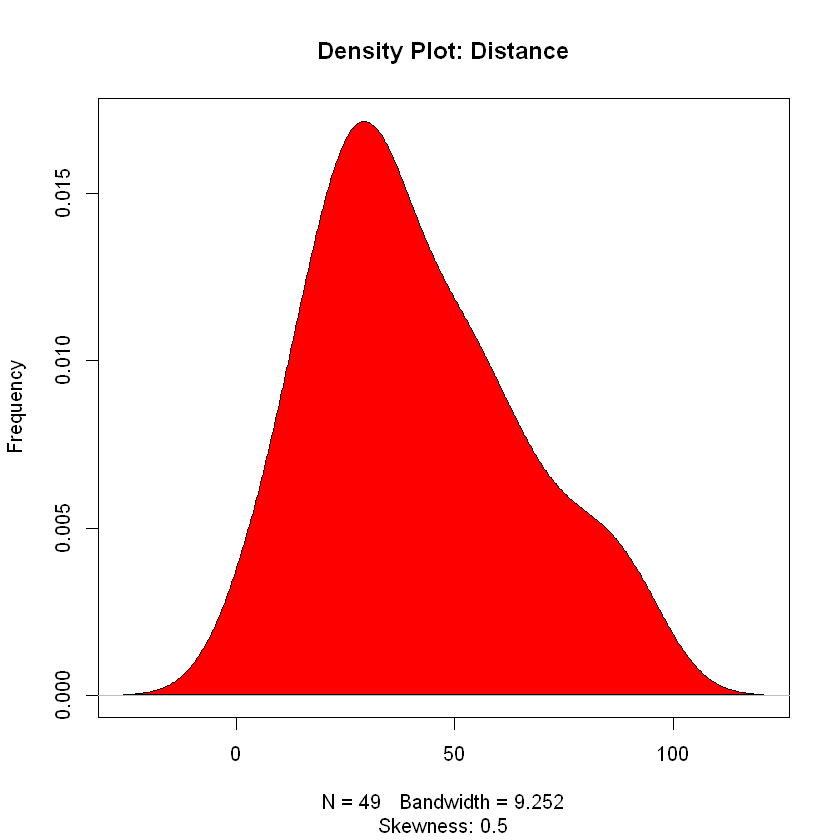

In [18]:
# density plot for 'dist'
plot(density(cars$dist), 
     main = "Density Plot: Distance", 
     ylab = "Frequency", 
     sub = paste("Skewness:", 
                 round(e1071::skewness(cars$dist), 2))) 
polygon(density(cars$dist), col = "red")


We can also examine normality using the `qqnorm()` function and a histogram of 

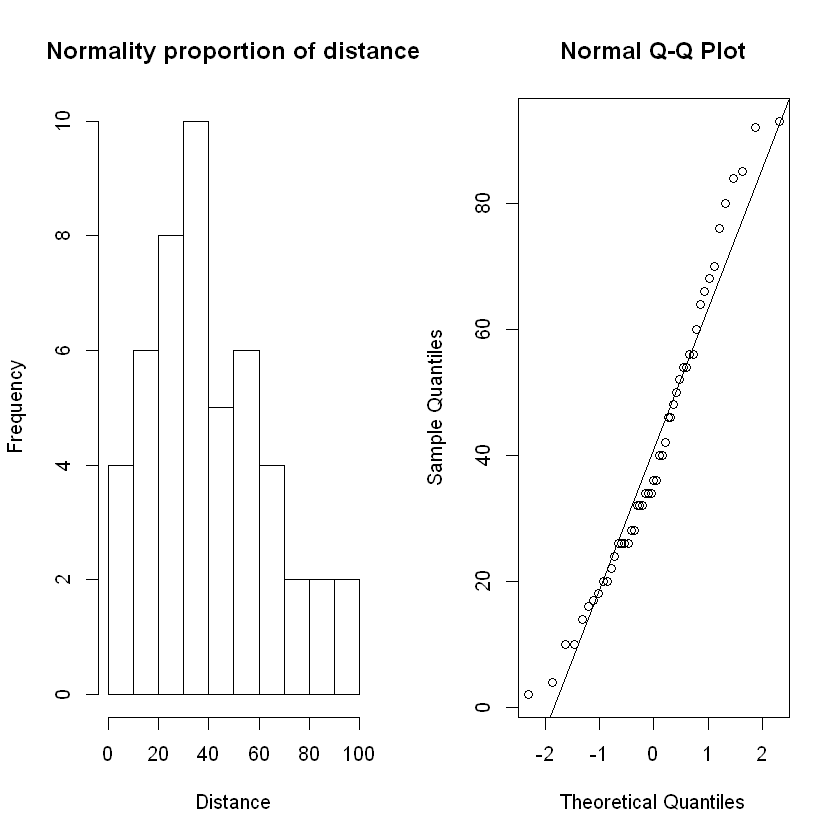

In [19]:
opar <- par(no.readonly = TRUE)
par(mfrow = c(1, 2)) # divide graph area in 2 columns
hist(cars$dist, main = "Normality proportion of distance", xlab = "Distance")

qqnorm(cars$dist)
qqline(cars$dist)
par <- opar

As you can see, the histogram shows an approximate normal distribution of distance that is slightly skewed
towards the left, but we can easily accept it as being normal. 

The corresponding quantilequantile plot shows the same information in a slightly different way. The line it shows
corresponds to the quantiles of the normal distribution, and the dots show the actual distribution in the data. The closer these dots are to the line, the closer the variable's distribution is to being normally distributed. 

As we can see, for the most part, distance is normally distributed, and it's at the extremes that we can see a slight deviation, which probably comes from the fact that our distance variable actually has hard limits at 0
and 1. However, we can also accept it as being normally distributed, and we can proceed to the next assumption safely.

### Training and testing datasets

For us to be able to measure the predictive accuracy of our models, we need to use some observations to validate our results. This means that our data will be split into two different groups:<br>
**Training data**<br>
**testing data**

Training data is used to extract knowledge and learn the relationship among variables. We specify the number of observations that will be picked for the training data as around 70% of the total number of observations available, and use the `replace = FALSE` command to specify that the picked observations may not be duplicated (by avoiding
a sample with replacement).

The testing data is composed of the remaining 30% of the observations. Since `sample` is a `Boolean` vector that contains a `TRUE` or `FALSE` value for each observation to specify whether or not it should be included, respectively, we can negate the vector to pick the other part of the data by prepending a minus sign (-) to the binary vector, effectively making every `TRUE` value a `FALSE` value, and vice versa. To understand this, let's look at the following code:

In [20]:
set.seed(1)
no_rows_data <- nrow(cars)
sample <- sample(1:no_rows_data, size = round(0.7 * no_rows_data), replace = FALSE)

training_data <- cars[sample, ]
testing_data <- cars[-sample, ]

Now we can build the linear model using the training data.

In [21]:
linearMod <- lm(dist ~ speed, data = training_data)

Before using a regression model, we have to ensure that it is statistically significant. 
Lets begin by printing the summary statistics for it.

In [22]:
linearMod


Call:
lm(formula = dist ~ speed, data = training_data)

Coefficients:
(Intercept)        speed  
    -15.563        3.831  


In [23]:
summary(linearMod)


Call:
lm(formula = dist ~ speed, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.058  -9.022  -2.241   8.876  41.928 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -15.562      7.071  -2.201   0.0351 *  
speed          3.831      0.432   8.869 3.93e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.69 on 32 degrees of freedom
Multiple R-squared:  0.7108,	Adjusted R-squared:  0.7018 
F-statistic: 78.65 on 1 and 32 DF,  p-value: 3.928e-10


Recall: a linear model is statistically significant only when both p-values are less that the pre-determined statistical significance level (ideally 0.05). 
This is visually interpreted by the significance stars at the end of the row. The more the stars beside the variable’s p-Value, the more significant the variable.

Model p-value = 1.298e-09

The column `t value` shows the t-test associated with testing the significance of the parameter listed in the first column. 

For example the t value of 8.869 refers to the t-test of the Speed 3.831 divided by the standard error of that estimate 0.432. 

Pr(>|t|) gives the p-value for that t-test. The asterisks following the Pr(>|t|) provide a visually accessible way of assessing whether the statistic met various α criterions.

A large t-value indicates that it is less likely the coefficient is not equal to zero purely by chance. So, higher the t-value, the better.

Pr(>|t|) or p-value is the probability that you get a t-value as high or higher than the observed value when the Null Hypothesis (the β coefficient is equal to zero or that there is no relationship) is true. 

So if the Pr(>|t|) is low, the coefficients are significant (significantly different from zero). 

If the Pr(>|t|) is high, the coefficients are not significant.

### AIC and BIC
The Akaike’s Information Criterion - AIC (Akaike, 1974) and the Bayesian Information Criterion - BIC (Schwarz, 1978) are measures of the goodness of fit of an estimated statistical model and can also be used for model selection. 

Both criteria depend on the maximised value of the likelihood function L for the estimated model.
For model comparison, the model with the lowest AIC and BIC score is preferred.


In [24]:
AIC(linearMod)

[1] 283.1724

In [25]:
BIC(linearMod)

[1] 287.7515

# Predicting data using the model
Now we will predict distance values and see how they compare with the testing data.

In [30]:
predicted_distance <- predict(linearMod, testing_data)

A simple correlation between the actuals and predicted values can be used as a form of accuracy measure. 
A higher correlation accuracy implies that actual and predicted values have similar directional movement, i.e. when the actuals values increase the predicted values also increase and vice-versa.

In [34]:
# make actuals_predicted dataframe.
actuals_predictions <- data.frame(cbind(actuals = testing_data$dist, predicted = predicted_distance))
head(actuals_predictions)

,actuals,predicted
,<dbl>,<dbl>
8,26,22.74759
11,28,26.57860
13,20,30.40961
16,26,34.24062
17,34,34.24062
19,46,34.24062


In [35]:
correlation_accuracy <- cor(actuals_predictions)
correlation_accuracy

,actuals,predicted
actuals,1.0000000,0.4741563
predicted,0.4741563,1.0000000


The model show us that it has 47% colleration accuracy.

Now we’ll calculate min max accuracy and mean absolute percentage error (MAPE) which is a measure of prediction accuracy.

In [36]:
# Min - max accuracy
min_max_accuracy <- mean(apply(actuals_predictions, 1, min) / apply(actuals_predictions, 1, max))
min_max_accuracy

[1] 0.7637057

In [37]:
# MAPE
mape <- mean(abs((actuals_predictions$predicted - actuals_predictions$actuals)) / actuals_predictions$actuals)
mape

[1] 0.3295982

### k-fold
Suppose, the model predicts satisfactorily on the 20% split (test data). Is that enough to believe that our model will perform equally well all the time? 
It is important to rigorously test the model’s performance as much as possible. One way is to ensure that the model equation you have will perform well when it is ‘built’ on a different subset of training data and predicted on the remaining data.

How do we do this?

Split your data into ‘k’ mutually exclusive random sample portions. Keep each portion as test data and build the model on the remaining (k-1 portion) data and calculate the mean squared error of the predictions. 

This is done for each of the ‘k’ random sample portions. Then finally, the average of these mean squared errors (for ‘k’ portions) is computed. We can use this metric to compare different linear models.

By doing this, we need to check two things:<br>
    If the model’s prediction accuracy isn’t varying too much for any one particular sample<br>
    If the lines of best fit don’t vary too much with respect the slope and level.<br>
    
In other words, they should be parallel and as close to each other as possible.
We use the `DAAG` library to do this and use the `CVlm()` function – cross-validation for linear regression.
`CVlm()` gives internal and cross-validation measures of predictive accuracy for multiple linear regression. 
The data are randomly assigned to a number of **folds**. Each fold is removed, in turn, while the remaining data is used to re-fit the regression model and to predict at the deleted observations.

Warning message:
"package 'DAAG' was built under R version 3.6.3"
Loading required package: lattice



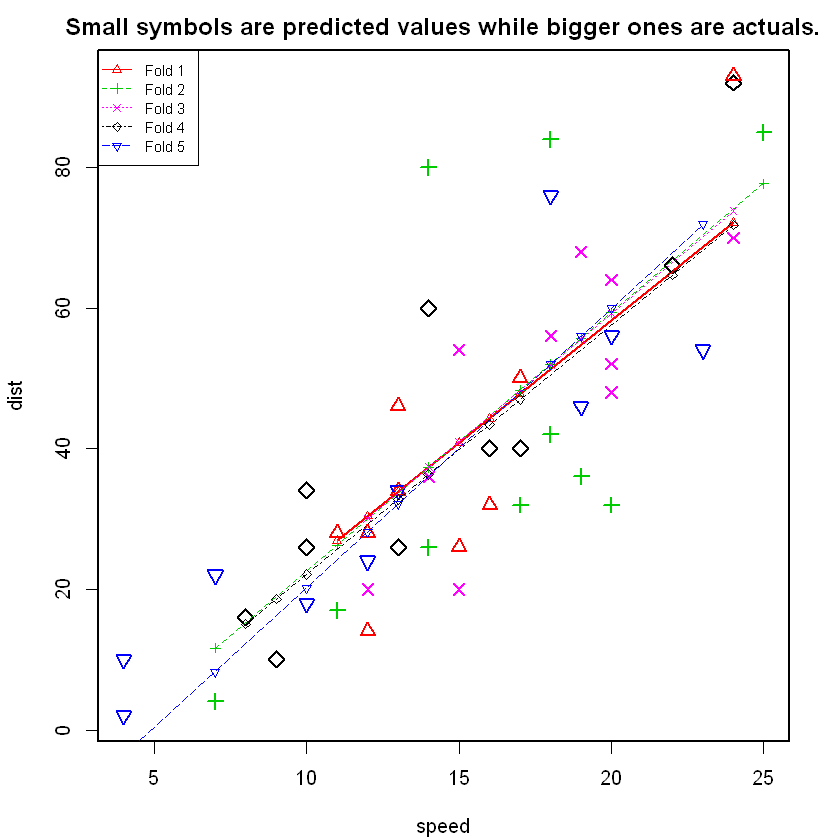

In [38]:
#install.packages("DAAG")
library(DAAG)
cvResults <- suppressWarnings(CVlm(data = cars, 
                                   form.lm = dist ~ speed, 
                                   m = 5, 
                                   dots = FALSE, 
                                   seed = 1, 
                                   legend.pos = "topleft", 
                                   printit = FALSE, 
                                   main = "Small symbols are predicted values while bigger ones are actuals."));

Are the dashed lines parallel? 
Are large and small symbols evenly dispersed for each colour?

Here's how we can predict a single value from the model. In this simple example, I'm creating a dataframe with a singel value in it which contains the cars speed.

In [55]:
df <- data.frame(speed = c(100))

In [56]:
predicted_distance <- predict(linearMod, df)

In [57]:
predicted_distance

1 
367.5386